In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

In [404]:
# SE CARGA TROCAFONE SOLO 1 VEZ.

tf = pd.read_csv('./data/events.csv',dtype=object)

### Se agregan al dataframe columnas con el tiempo

In [405]:
# Agregamos nuevas columnas para trabajar mejor con el tiempo. (mes, dia, dia del año)
tf['timestamp_datetime'] = pd.to_datetime(tf['timestamp'])
tf['timestamp_month'] = tf['timestamp_datetime'].dt.month
tf['timestamp_day'] = tf['timestamp_datetime'].dt.day
tf['timestamp_weekday'] = tf['timestamp_datetime'].dt.weekday_name
tf['timestamp_dayofyear'] = tf['timestamp_datetime'].dt.dayofyear
tf['timestamp_hour'] = tf['timestamp_datetime'].dt.hour

# En este notbook se encuentra: 
    -Parte 1: Información general del data set
    -Parte 2: Información específica de cada evento
    

# --------- NUEVAS CONVENCIONES ----------

-tf:  set de datos. 

-Secciones grandes: representa cómo trabajamos la información.

1) Introducción al data set

2) Análisis de los eventos por separado

3) Cruce de información entre varios eventos

... 

-Con un # se indican las secciones grandes y con ## las subsecciones. Las subscciones de las
subsecciones se indican con **

-Trabajamos con el modelo pregunta respuesta -> lo más que se pueda

-Al principio, se hicieron cortes según el evento -> NO REPETIR ESTOS CORTES PARA NO CARGAR LA RAM.

-tratar de guardar en variables los cortes y no repetirlos en los gráficos en cada una de las variables -> PARA NO CARGAR LA RAM

-El análisis de null está hecho al principio, no hace falta repetirlos aunque está bueno referenciar la sección en la que se encuentra y confirmar el número.

-TENER EXTREMO CUIDADO CON EL ÚSO DE LOS ÍNDICES, LUEGO NOS AYUDARAN A REALIZAR EL INFORME. 

------------------------------------------------------------------------------------------


# 1) Breve descripcion del dataset



## 1.1) Análisis preliminar de dataset

**1.1.1) Cantidad de columnas**

In [4]:
tf.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'timestamp_datetime',
       'timestamp_month', 'timestamp_day', 'timestamp_weekday',
       'timestamp_dayofyear', 'timestamp_hour'],
      dtype='object')

**1.1.2) Muestra de las primeras filas**

In [5]:
tf.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,device_type,screen_resolution,operating_system_version,browser_version,timestamp_datetime,timestamp_month,timestamp_day,timestamp_weekday,timestamp_dayofyear,timestamp_hour
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2018-05-31 23:38:05,5,31,Thursday,151,23
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Smartphone,360x640,Android 6,Chrome Mobile 39,2018-05-31 23:38:05,5,31,Thursday,151,23
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,2018-05-31 23:38:09,5,31,Thursday,151,23
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,2018-05-31 23:38:40,5,31,Thursday,151,23
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,2018-05-29 13:29:25,5,29,Tuesday,149,13


**1.1.3)Tipos que contienen las columnas**

In [6]:
#ESTO NO DA INFORMACIÓN SOBRE EL DATA SET -> ES INFORMACIÓN ESTADÍASTICA
tf.describe()

,timestamp_month,timestamp_day,timestamp_dayofyear,timestamp_hour
count,"1,011,288.00","1,011,288.00","1,011,288.00","1,011,288.00"
mean,4.84,15.21,130.59,13.35
std,1.11,8.77,32.06,7.38
min,1.00,1.00,1.00,0.00
25%,4.00,8.00,120.00,9.00
50%,5.00,15.00,140.00,15.00
75%,6.00,23.00,153.00,19.00
max,6.00,31.00,166.00,23.00


In [7]:
#Este es el correcto
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 29 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

## 1.2) Análisis de los eventos
Los eventos representan cada fila de nuestro dataset

**1.2.1) Nombre de los eventos**

In [8]:
tf['event'].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

**1.2.2) ¿Cuál es la ocurrencia de los eventos?**

Text(0,0.5,'Eventos')

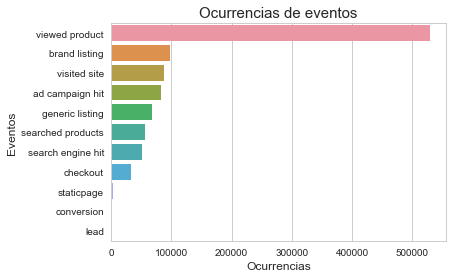

In [9]:
g = sns.barplot(x=tf['event'].value_counts().values, y=tf['event'].value_counts().index, orient='h')
g.set_title("Ocurrencias de eventos", fontsize=15)
g.set_xlabel("Ocurrencias", fontsize=12)
g.set_ylabel("Eventos", fontsize=12)

** 1.2.3) Ocurrencia total de eventos por horario   -> CREO QUE ESTO ESTÁ MAL PQ EL ÚNICO EVENTO QUE REGISTRA COUNTRY ES EL VISITED SITE**

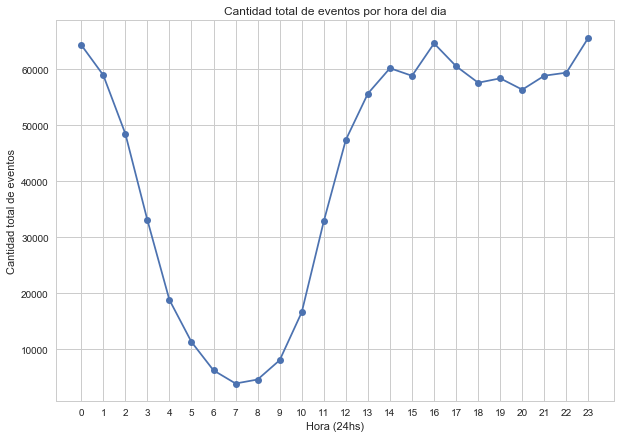

In [10]:
tf_hr = tf.filter(items = ['country','timestamp_datetime', 'event'])

tf_hr['hour'] = tf_hr['timestamp_datetime'].dt.hour

g = tf_hr['hour'].value_counts(sort=False).plot(kind='line', figsize=(10, 7), grid=True, style="-o")
g.set(xlabel='Hora (24hs)', ylabel='Cantidad total de eventos', title='Cantidad total de eventos por hora del dia')

plt.xticks(range(0, 24));

## 1.3) Análisis de los elementos null

**1.3.1) ¿Hay eventos nulos en la columna event?**

In [11]:
tf['event'].isnull().sum()

0

**1.3.2) ¿Hay fechas nulas?**

In [12]:
tf['timestamp'].isnull().any()

False

**1.3.3) ¿Qué campos son obligatorios para cada evento? **

Hay otras columnas que pueden tener algunos elementos null pero pueden servir igual (son pocos).

In [13]:
rel_event = tf.groupby('event').agg(lambda x: x.isnull().sum()).T
rel_event

event,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site
timestamp,0,0,0,0,0,0,0,0,0,0,0
person,0,0,0,0,0,0,0,0,0,0,0
url,71,98635,33735,1172,67534,448,50957,56073,3598,528931,87378
sku,82827,98635,0,0,67534,448,50957,56073,3598,0,87378
model,82827,98635,2,0,67534,0,50957,56073,3598,0,87378
condition,82827,98635,2,0,67534,448,50957,56073,3598,0,87378
storage,82827,98635,2,0,67534,448,50957,56073,3598,0,87378
color,82827,98635,2,0,67534,448,50957,56073,3598,0,87378
skus,82827,311,33735,1172,113,448,50957,119,3598,528931,87378
search_term,82827,98635,33735,1172,67534,448,50957,7106,3598,528931,87378


**Los campos obligatorios son: **


(los eventos hora mes y nombre de dia son comunes a todos porque timestamp es comun a todos y todos los timestamp tiene información en el formato correcto)


Para el evento **viewed product**: timestamp | person | sku | model | condition | storage | color.

Para el evento **brand listing**: timestamp | person | skus -> **analizar los 311 skus null**

Para el evento **visited site**: channel | new_vs_returning | city | region | country | device_tipe | screen resolution | operating system version | browser version

Para el evento **ad campaing hit**: timestap | person | url | campaing_sourse -> **analizar que sucede con los 71 null que aparecen url , y los 31 que aparecen en campaing_source y eliminarlos si no sirve**

Para el evento **generic listing**: timestamp | person | skus ->**analizar que sucede con los 113 null que aparecen en skus**

Para el evento **serched product**: timestamp | person | skus | search_term -> **analizar que sucede con los 119 null que aparecen skus y 7106 null que aparecen en search_term**

Para el evento **serched engine**: timestamp | person | search engine

Para el evento **checked out**: timestamp | person | sku | color | storage | model | condition -> **analizar que sucede con los 2 null que aparecen en: color, storage, model, condition**

Para el evento **static page**: timestamp | person | satatic page

Para le evento **conversion**: timestamp | person | sku | model | color | condition | storage

Para el evento **lead**: timestamp | person | model

Esto lo deducimos porque si la cantidad de apariciones de cada evento es igual a la cantidad de nulls que tiene en una columna -> esa columna no representa nada para el evento. 

# 2) Análisis por evento

La idea de esta sección es analizar por evento. En primera instancia se analiza la relación de los eventos con cada una de sus columnas obligatorias y luego aumentamos la correlación entre las columnas. 

**Todavía no se hacen relaciones entre eventos**

** Hago todas las particiones en una sóla linea para evitar repetición de código (uso snake case) ** 

In [403]:
viewed_product = tf[tf['event'] == 'viewed product']
brand_listing    = tf[tf['event'] == 'brand listing']
visited_site =  tf[tf['event'] == 'visited site']
ad_campaign_hit = tf[tf['event'] == 'ad campaign hit']
generic_listing = tf[tf['event'] == 'generic listing']
searched_products = tf[tf['event'] == 'searched products']
search_engine_hit = tf[tf['event'] == 'search engine hit']
checkout = tf[tf['event'] == 'checkout']
staticpage = tf[tf['event'] == 'staticpage']
conversion = tf[tf['event'] == 'conversion']
lead = tf[tf['event'] == 'lead']

## 2.1) Viewed product 
Este evento representa: "El usuario visita una página de producto"

** 2.1.1) ¿Cuál fueron los modelos de celulares mas visitados? **

In [15]:
# Modelo de celular mas visitado.
viewed_product['model'].value_counts()

iPhone 6                                     47538
iPhone 5s                                    42045
iPhone 6S                                    36930
iPhone 7                                     26330
Samsung Galaxy S7 Edge                       23062
Samsung Galaxy S7                            18085
iPhone 7 Plus                                17853
iPhone SE                                    15874
Samsung Galaxy S8                            15868
iPhone 6S Plus                               12250
iPhone 6 Plus                                12098
iPhone 5c                                    12049
Samsung Galaxy J5                            11036
Samsung Galaxy S6 Flat                       10724
Samsung Galaxy S6 Edge                       10580
Samsung Galaxy S8 Plus                       10006
iPhone 5                                      8846
Samsung Galaxy J7 Prime                       8400
Motorola Moto G4 Plus                         7522
Motorola Moto X Play 4G Dual   

Se analizaron los 15 celulares más visitados

In [16]:
# 15 celulares mas visitados.
modelos_viewed = viewed_product['model'].value_counts().head(15)

Text(0,0.5,'Celulares')

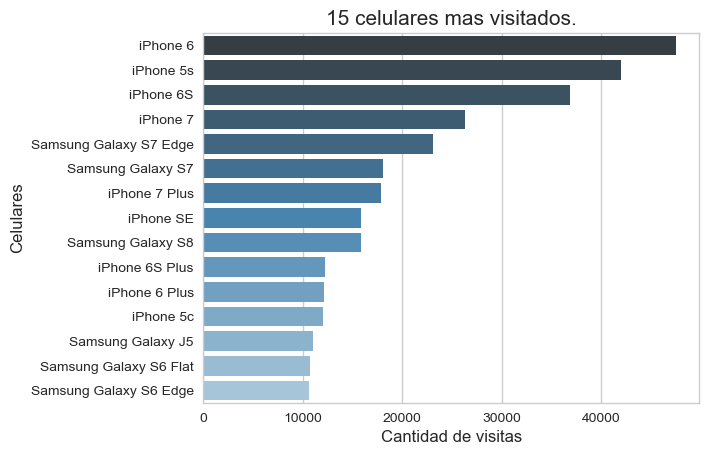

In [31]:
# Grafico de barras de los 15 celulares mas visitados.

g = sns.barplot(x=modelos_viewed, y=viewed_product['model'].value_counts().head(15).index,palette="Blues_d", orient='h')

g.set_title("15 celulares mas visitados.", fontsize=15)
g.set_xlabel("Cantidad de visitas", fontsize=12)
g.set_ylabel("Celulares", fontsize=12)

In [17]:
viewed_product.dropna(axis = 'columns').columns

Index(['timestamp', 'event', 'person', 'sku', 'model', 'condition', 'storage',
       'color', 'timestamp_datetime', 'timestamp_month', 'timestamp_day',
       'timestamp_weekday', 'timestamp_dayofyear', 'timestamp_hour'],
      dtype='object')

**2.1.2) ¿Cuáles fueron los 15 colores más requeridos?**

Preto                             0.23
Dourado                           0.20
Cinza espacial                    0.12
Branco                            0.10
Prateado                          0.09
Ouro Rosa                         0.06
Prata                             0.03
Rosa                              0.03
Preto Matte                       0.03
Azul                              0.02
Ametista                          0.01
Platinum                          0.01
Preto Brilhante                   0.01
Ouro                              0.01
Vermelho                          0.01
Name: color, dtype: float64


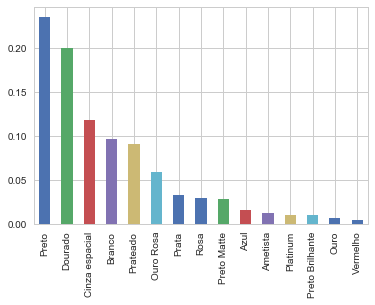

In [64]:
productosColorGraf = viewed_product.color.value_counts(normalize = True).head(15)
print(productosColorGraf)
productosColorGraf.plot(kind = 'bar')

El 50% de de los usuarios concentró su elección en los siguientes colores: 
    - el 23% de los productos son negro
    - el 20% de los productos son dorados
    - el 11% de los productos son gris espacial

**2.1.3) ¿Cuál es el almacenamiento de los modelos que los usuarios visitaron?**

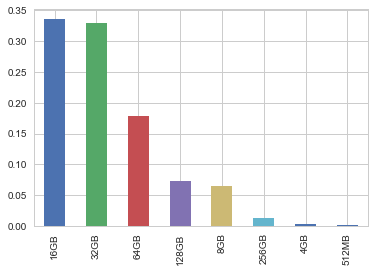

In [19]:
productosStorageGraf = viewed_product.storage.value_counts(normalize = True)
productosStorageGraf.plot(kind = 'bar')

Conclusión de los productos que visitó el usuario sobre el almacenamiento de los productos: 


    - El 33% visita productos con almacenamiento de 16 GB
    - El 32% visita productos con almacenamiento de 32 GB
    - El 17% visita productos con almacenamiento de 64 GB
    - EL 6% visita productos con almacenamiento de 8 GB
    

**2.1.4) ¿Cuáles fueron las condiciones de los modelos que los usuarios visitaron?**

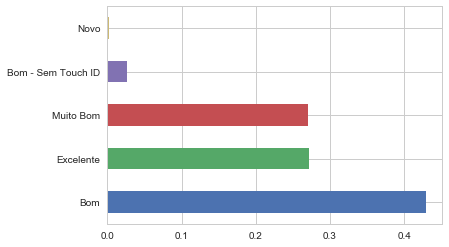

In [89]:
productosCondicionesGraf = viewed_product.condition.value_counts(normalize = True)
#print(productosCondicionesGraf)
productosCondicionesGraf.plot(kind = 'barh')

    -el 0,02 porciento de los productos que visita el usuario son nuevos
         
    -el 2% de los productos que tienen identificador de huella digital 
    
    -el 42% de los productos son de calidad buena
    
    -el 27% de los productos son de calidad excelente 
    
    -el 27% de los productos son de calidad muy buena

**2.1.5) ¿En qué momento del día los usuarios visitaron los modelos?**

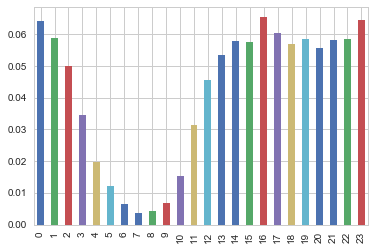

In [20]:
productosTimeStampGraf = viewed_product.timestamp_hour.value_counts(normalize = True, sort = False)
productosTimeStampGraf.plot(kind = 'bar')

Los modelos se visitan más frecuentemente entre las 14hs y las 2hs.

**2.1.6) ¿Qué días se visitaron más productos?**

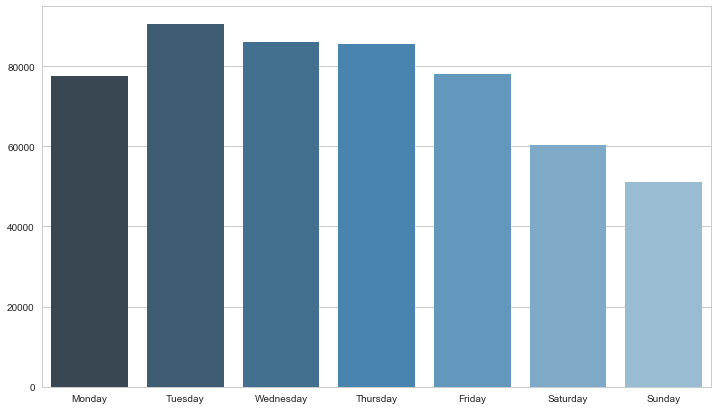

In [102]:
fig, ax = plt.subplots(figsize=(12,7))
dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total = viewed_product['timestamp_weekday'].value_counts().reindex(dias)
g = sns.barplot(x=total.index, y=total.values, palette="Blues_d", orient='v', ax=ax)


    -El día que menos productos se visitan son los domingos, seguido por los sábados

**2.1.7)¿En qué meses se visitaron más productos?**

Text(0.5,1,'Viewed product por mes')

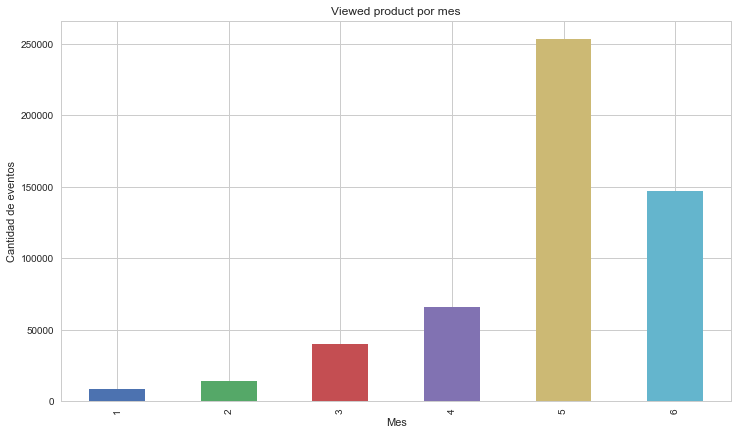

In [362]:
g = viewed_product.groupby('timestamp_month').size()\
                        .plot(kind='bar', figsize=(12,7))
g.set_xlabel("Mes")
g.set_ylabel('Cantidad de eventos')
g.set_title('Viewed product por mes')
#g.legend(['Viewed product']);


  -el 47% de los productos se visitaron en Mayo
  
  -el 27% de los productos se visitaron en Junio (cayó respecto a Mayo) **ESTO SE PUEDE DEBER AL HECHO DE QUE NO ESTÁN TODOS LOS DÍAS DE JUNIO SINO LA PRIMERA QUINCENA **
  
  -el 13% de los productos se visitaron en Abril
  
  -el 7% de los productos se visitaron en marzo
  
  -el 2% de los productos se visitaron en Febrero
  
  -el 1% de los productos se visitaron en Enero


**2.1.8)¿Cuáles fueron las visitas para cada modelo según el color?**

In [98]:
# Visitas de cada celular para cada color.
visitas_por_color = viewed_product.groupby(['model','color']).agg({'event':'count'})
visitas_por_color.columns = ['visitas']
visitas_por_color = visitas_por_color.reset_index()
visitas_por_color

,model,color,visitas
0,Asus Live,Preto Azul,4
1,Asus Zenfone 2,Cinza,63
2,Asus Zenfone 2,Dourado,18
3,Asus Zenfone 2,Preto,21
4,Asus Zenfone 2,Vermelho,36
5,Asus Zenfone 2 Deluxe,Branco,151
6,Asus Zenfone 2 Deluxe,Roxo,50
7,Asus Zenfone 2 Laser,Dourado,1
8,Asus Zenfone 2 Laser,Preto,5
9,Asus Zenfone 2 Laser,Vermelho,6


**2.1.9) Según la información de 2.1.1 y de 2.1.8 , ¿cuáles fueron los 5 colores más solicitados de los 5 celulares más buscados?** 


In [101]:
cel_mas_visitados = ['iPhone 6','iPhone 5s','iPhone 6S','iPhone 7', 'Samsung Galaxy S7 Edge']
cel_mas_visitados_por_color = visitas_por_color.loc[visitas_por_color['model'].isin(cel_mas_visitados)]
cel_mas_visitados_por_color = cel_mas_visitados_por_color.groupby(['model','color']).agg({'visitas':sum})
cel_mas_visitados_por_color = cel_mas_visitados_por_color.sort_values(['model','visitas'],ascending=False).groupby('model').head(5)
cel_mas_visitados_por_color = viewed_product[['model','color']].loc[viewed_product['model'].isin(['iPhone 5s','iPhone 6','iPhone 6S','iPhone 7','iPhone 7 Plus'])]
cel_mas_visitados_por_color = pd.crosstab(cel_mas_visitados_por_color.model,cel_mas_visitados_por_color.color)
cel_mas_visitados_por_color

color,Cinza espacial,Dourado,Ouro Rosa,Prateado,Preto Brilhante,Preto Matte,Vermelho
model,,,,,,,
iPhone 5s,16745,11230,0,14070,0,0,0
iPhone 6,19306,14126,0,14106,0,0,0
iPhone 6S,11046,8969,10636,6279,0,0,0
iPhone 7,0,4038,6593,1709,3468,9231,1291
iPhone 7 Plus,0,2014,5521,1497,2332,5722,767


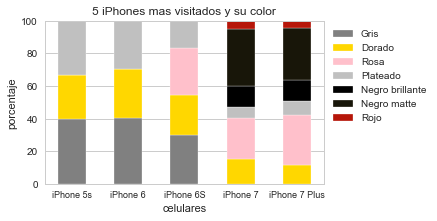

In [97]:
r = [0,1,2,3,4]
cmvpc = cel_mas_visitados_por_color

totals = [i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(cmvpc['Cinza espacial']\
                                                 , cmvpc['Dourado'],cmvpc['Ouro Rosa'], cmvpc['Prateado']\
                                                 , cmvpc['Preto Brilhante'],cmvpc['Preto Matte'],cmvpc['Vermelho'])]

celconCinza = [i / j * 100 for i,j in zip(cmvpc['Cinza espacial'], totals)]
celconDourado = [i / j * 100 for i,j in zip(cmvpc['Dourado'], totals)]
celconRosa = [i / j * 100 for i,j in zip(cmvpc['Ouro Rosa'], totals)]
celconPrateado = [i / j * 100 for i,j in zip(cmvpc['Prateado'], totals)]
celconBrilhante = [i / j * 100 for i,j in zip(cmvpc['Preto Brilhante'], totals)]
celconMatte = [i / j * 100 for i,j in zip(cmvpc['Preto Matte'], totals)]
celconVermelho = [i / j * 100 for i,j in zip(cmvpc['Vermelho'], totals)]

barWidth = 0.5
names = ('iPhone 5s','iPhone 6','iPhone 6S','iPhone 7','iPhone 7 Plus')

plt.figure(figsize=(5,3))

plt.bar(r, celconCinza, color='gray', edgecolor='white', width=barWidth, label = 'Gris')

plt.bar(r, celconDourado, bottom=celconCinza, color='gold', edgecolor='white', width=barWidth, label = 'Dorado')

plt.bar(r, celconRosa, bottom=[i+j for i,j in zip(celconCinza, celconDourado)], color='pink', edgecolor='white', width=barWidth, label = 'Rosa')

plt.bar(r, celconPrateado, bottom=[i+j+k for i,j,k in zip(celconCinza, celconDourado,celconRosa)], color='silver', edgecolor='white', width=barWidth, label = 'Plateado')

plt.bar(r, celconBrilhante, bottom=[i+j+k+l for i,j,k,l in zip(celconCinza, celconDourado,celconRosa,celconPrateado)], color='black', edgecolor='white', width=barWidth, label = 'Negro brillante')

plt.bar(r, celconMatte, bottom=[i+j+k+l+m for i,j,k,l,m in zip(celconCinza, celconDourado,celconRosa,celconPrateado,celconBrilhante)], color='#181609', edgecolor='white', width=barWidth, label = 'Negro matte')

plt.bar(r, celconVermelho, bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(celconCinza, celconDourado,celconRosa,celconPrateado,celconBrilhante,celconMatte)], color='#b61609', edgecolor='white', width=barWidth, label = 'Rojo')




plt.xticks(r, names,fontsize=9)
plt.title('5 iPhones mas visitados y su color')
plt.xlabel('celulares')
plt.ylabel('porcentaje')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
plt.show()


**2.1.10) ¿Cuáles fueron las visitas de cada modelo según su capacidad de almacenamiento?**

In [88]:
visitas_por_storage = viewed_product.groupby(['model','storage']).agg({'event':'count'})
visitas_por_storage.columns = ['visitas']
visitas_por_storage

visitas
model                     storage         
Asus Live                 16GB           4
Asus Zenfone 2            16GB          95
                          32GB          35
                          64GB           8
Asus Zenfone 2 Deluxe     128GB        201
Asus Zenfone 2 Laser      16GB          12
Asus Zenfone 3 Max  32 GB 32GB         124
Asus Zenfone 3 Max 16 GB  16GB         141
Asus Zenfone 3 Zoom       128GB          1
                          32GB          16
                          64GB          25
Asus Zenfone 5            8GB          720
Asus Zenfone 6            8GB          583
Asus Zenfone Go           16GB           9
Asus Zenfone Selfie       32GB          49
LG  X Screen              16GB         283
LG G3 Beat D724           8GB          304
LG G3 D855                16GB        1065
LG G3 Stylus D690         8GB          251
LG G4 Beat H736           8GB          312
LG G4 H815P               32GB         539
LG G4 H818P               32GB        1266
LG G4 Stylus H630         16GB         106
LG G4 Stylus HDTV H540T   16GB         133
LG G5 SE                  32GB        1143
LG G6                     32GB          93
LG K10                    16GB         236
LG K10 Novo               32GB         816
LG K10 TV                 16GB         795
LG K4                     8GB           53
...                                    ...
iPhone 6                  128GB       6218
                          16GB       25915
                          64GB       15405
iPhone 6 Plus             128GB       1015
                          16GB        7080
                          64GB        4003
iPhone 6S                 128GB       3506
                          16GB       16530
                          32GB        5563
                          64GB       11331
iPhone 6S Plus            128GB       1989
                          16GB        5111
                          32GB        1055
                          64GB        4095
iPhone 7                  128GB      11175
                          256GB       2187
                          32GB       12968
iPhone 7 Plus             128GB       9797
                          256GB       2840
                          32GB        5216
iPhone 8                  256GB        372
                          64GB         625
iPhone 8 Plus             256GB        595
                          64GB         553
iPhone SE                 128GB        512
                          16GB        7075
                          32GB        1592
                          64GB        6695
iPhone X                  256GB        556
                          64GB         138

[281 rows x 1 columns]

**2.1.11)¿Cuáles fueron los almacenamientos de los 5 celulares más buscados?**

In [ ]:
cel_mas_visitados = ['iPhone 6','iPhone 5s','iPhone 6S','iPhone 7', 'Samsung Galaxy S7 Edge']
cel_mas_visitados_por_storage = viewed_product[['model','storage']].loc[viewed_product['model'].isin(cel_mas_visitados)]
cel_mas_visitados_por_storage = pd.crosstab(cel_mas_visitados_por_storage.model,cel_mas_visitados_por_storage.storage)
cel_mas_visitados_por_storage

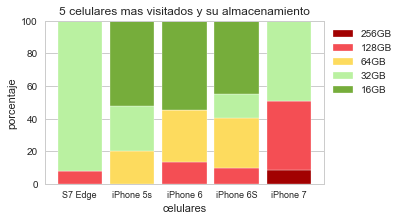

In [92]:
r = [0,1,2,3,4]
cmvps = cel_mas_visitados_por_storage

totals = [i+j+k+l+m for i,j,k,l,m in zip(cmvps['128GB'], cmvps['16GB'],\
                                         cmvps['256GB'], cmvps['32GB'], cmvps['64GB'])]
celcon128 = [i / j * 100 for i,j in zip(cmvps['128GB'], totals)]
celcon16 = [i / j * 100 for i,j in zip(cmvps['16GB'], totals)]
celcon256 = [i / j * 100 for i,j in zip(cmvps['256GB'], totals)]
celcon32 = [i / j * 100 for i,j in zip(cmvps['32GB'], totals)]
celcon64 = [i / j * 100 for i,j in zip(cmvps['64GB'], totals)]

barWidth = 0.85
names = ('S7 Edge','iPhone 5s','iPhone 6','iPhone 6S','iPhone 7')

plt.figure(figsize=(5,3))

plt.bar(r, celcon256, color='#A20101', edgecolor='white', width=barWidth, label = '256GB')

plt.bar(r, celcon128, bottom=celcon256, color='#F44E54', edgecolor='white', width=barWidth, label = '128GB')

plt.bar(r, celcon64, bottom=[i+j for i,j in zip(celcon256, celcon128)], color='#FDDB5E', edgecolor='white'\
                                               , width=barWidth, label = '64GB')

plt.bar(r, celcon32, bottom=[i+j+k for i,j,k in zip(celcon256, celcon128,celcon64)], color='#BAF1A1'\
                                                    , edgecolor='white', width=barWidth, label = '32GB')

plt.bar(r, celcon16, bottom=[i+j+k+l for i,j,k,l in zip(celcon256, celcon128,celcon64,celcon32)], color='#76AD3B'\
                                                        , edgecolor='white', width=barWidth, label = '16GB')

plt.xticks(r, names,fontsize=9)
plt.title('5 celulares mas visitados y su almacenamiento')
plt.xlabel('celulares')
plt.ylabel('porcentaje')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
plt.show()

**2.1.12)¿Cuáles fueron las visitas de cada modelo según su condicion?**

In [90]:
visitas_por_condition = viewed_product.groupby(['model','condition']).agg({'event':'count'})
visitas_por_condition.columns = ['visitas']
visitas_por_condition

visitas
model                     condition                  
Asus Live                 Excelente                 4
Asus Zenfone 2            Bom                      73
                          Excelente                25
                          Muito Bom                40
Asus Zenfone 2 Deluxe     Bom                      13
                          Excelente                30
                          Muito Bom               158
Asus Zenfone 2 Laser      Bom                       6
                          Excelente                 2
                          Muito Bom                 4
Asus Zenfone 3 Max  32 GB Bom                       7
                          Excelente                18
                          Muito Bom                99
Asus Zenfone 3 Max 16 GB  Bom                      37
                          Excelente                40
                          Muito Bom                64
Asus Zenfone 3 Zoom       Bom                       1
                          Excelente                10
                          Muito Bom                31
Asus Zenfone 5            Bom                     203
                          Excelente               336
                          Muito Bom               181
Asus Zenfone 6            Bom                     136
                          Excelente               217
                          Muito Bom               230
Asus Zenfone Go           Excelente                 4
                          Muito Bom                 5
Asus Zenfone Selfie       Bom                      24
                          Excelente                 5
                          Muito Bom                20
...                                               ...
iPhone 6 Plus             Bom - Sem Touch ID       26
                          Excelente              3249
                          Muito Bom              4185
iPhone 6S                 Bom                   13295
                          Bom - Sem Touch ID      426
                          Excelente             11571
                          Muito Bom             11638
iPhone 6S Plus            Bom                    5388
                          Bom - Sem Touch ID       23
                          Excelente              3701
                          Muito Bom              3138
iPhone 7                  Bom                   10508
                          Excelente              7701
                          Muito Bom              8121
iPhone 7 Plus             Bom                    4919
                          Excelente              7218
                          Muito Bom              5716
iPhone 8                  Bom                     150
                          Excelente               558
                          Muito Bom               289
iPhone 8 Plus             Bom                     114
                          Excelente               733
                          Muito Bom               301
iPhone SE                 Bom                    5165
                          Bom - Sem Touch ID      568
                          Excelente              5249
                          Muito Bom              4892
iPhone X                  Bom                      58
                          Excelente               356
                          Muito Bom               280

[578 rows x 1 columns]

**2.1.13)¿Cuál fue la relación entre día de la semana y mes?**

In [42]:
# Vemos las visitas a un producto segun dia de la semana y mes.
visitas_prod_mes_dia_semana = viewed_product.groupby(['timestamp_month','timestamp_weekday']).agg({'event':'count'})\
                .pivot_table(index = 'timestamp_weekday',columns = 'timestamp_month',values = 'event')
visitas_prod_mes_dia_semana

timestamp_month,1,2,3,4,5,6
timestamp_weekday,,,,,,
Friday,1415,2040,5946,10368,29950,28228
Monday,1128,1949,5091,11369,36761,21355
Saturday,979,1658,5167,7826,26202,18481
Sunday,805,1240,3723,6907,23317,15169
Thursday,1155,2098,7201,10080,44073,20789
Tuesday,1722,2539,6566,9665,47285,22633
Wednesday,1647,2606,5972,9729,45724,20373


Text(50.7222,0.5,'Dia de la visita')

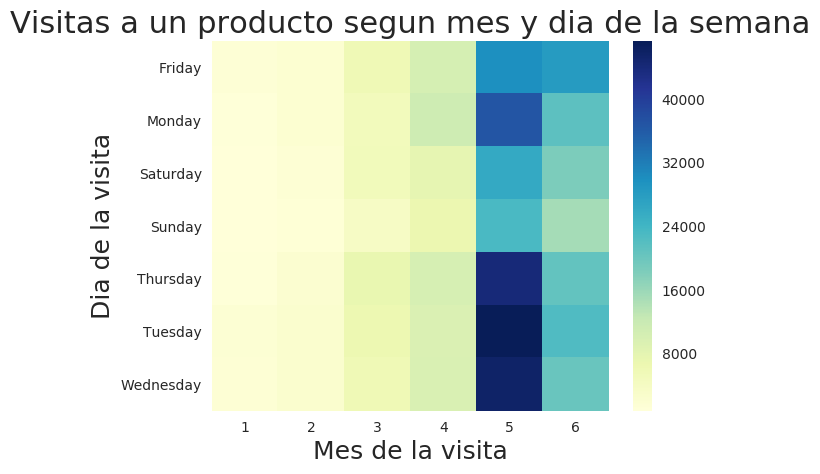

In [43]:
visitas_prod_mes_dia_semana = sns.heatmap(visitas_prod_mes_dia_semana,  cmap="YlGnBu")
visitas_prod_mes_dia_semana.set_title("Visitas a un producto segun mes y dia de la semana", fontsize=22)
visitas_prod_mes_dia_semana.set_xlabel("Mes de la visita",fontsize=18)
visitas_prod_mes_dia_semana.set_ylabel("Dia de la visita", fontsize=18)

**2.1.14)¿Cuál fue la relación entre los días y el mes?**

In [60]:
# Vemos las visitas a un producto segun mes y dia del mes.
visitas_prod_mes_dia = viewed_product.groupby(['timestamp_month','timestamp_day']).agg({'event':'count'})\
                .pivot_table(index = 'timestamp_month',columns = 'timestamp_day',values = 'event')
visitas_prod_mes_dia

timestamp_day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
timestamp_month,,,,,,,,,,,,,,,,,,,,,
1,6.00,122.00,263.00,250.00,510.00,179.00,171.00,210.00,431.00,445.00,...,294.00,317.00,260.00,161.00,298.00,313.00,208.00,252.00,307.00,329.00
2,307.00,407.00,238.00,319.00,464.00,333.00,355.00,277.00,379.00,413.00,...,613.00,814.00,416.00,399.00,737.00,849.00,833.00,nan,nan,nan
3,629.00,739.00,735.00,507.00,755.00,"1,309.00",749.00,956.00,767.00,"1,211.00",...,"2,309.00","1,790.00","1,306.00","1,214.00","1,690.00","2,180.00","1,914.00","2,130.00","1,252.00",866.00
4,805.00,"1,818.00","2,654.00","2,188.00","2,182.00","1,997.00","1,486.00",925.00,"1,892.00","2,481.00",...,"1,154.00","2,081.00","2,446.00","3,084.00","3,731.00","3,655.00","3,164.00","2,545.00","3,812.00",nan
5,"3,702.00","4,231.00","4,623.00","4,362.00","4,031.00","3,496.00","4,802.00","5,589.00","5,662.00","6,556.00",...,"11,380.00","10,077.00","9,375.00","8,976.00","7,555.00","6,516.00","10,359.00","12,552.00","12,587.00","10,767.00"
6,"10,956.00","10,323.00","8,499.00","11,799.00","13,555.00","11,571.00","12,339.00","9,533.00","8,158.00","6,670.00",...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


Text(50.7222,0.5,'Mes de la visita')

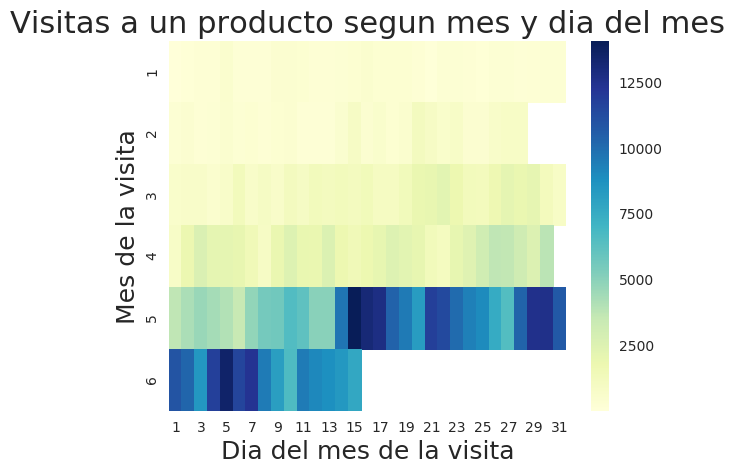

In [61]:
visitas_prod_mes_dia = sns.heatmap(visitas_prod_mes_dia,  cmap="YlGnBu")
visitas_prod_mes_dia.set_title("Visitas a un producto segun mes y dia del mes", fontsize=22)
visitas_prod_mes_dia.set_xlabel("Dia del mes de la visita",fontsize=18)
visitas_prod_mes_dia.set_ylabel("Mes de la visita", fontsize=18)

**2.1.15)¿Cómo fueron las visitas según el día del año?**

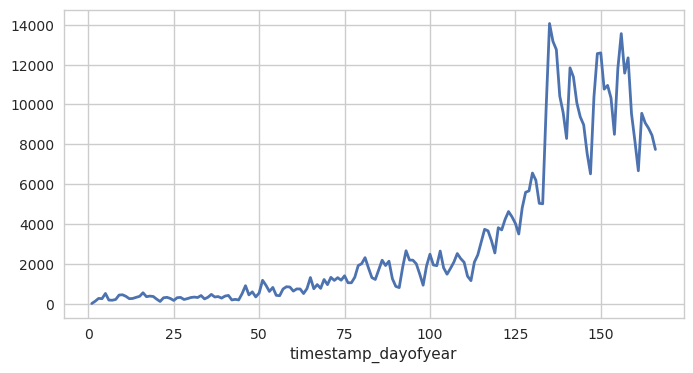

In [62]:
# Visitas a productos segun dia del año
viewed_product.groupby('timestamp_dayofyear').count().loc[:,'event'].plot(linewidth=2,figsize=(8,4))


## 2.2) Ad campaign hit

Este evento representa: "El usuario visita una página de producto" El usuario ingresa al sitio mediante una campana de marketing online.

[quitar]Me puede interesar analizar url, person , campaign source y el tiempo.

La columna cuenta con 31 valores nulos de campain_source (según 1.3.3), asique los puedo descartar. 

**2.2.1)¿Cuáles fueron las campañas publicitarias más populares? **

In [108]:
campanias_populares = ad_campaign_hit['campaign_source'].value_counts()
campanias_populares

google              58153
criteo               9694
rtbhouse             8550
zanox                1673
emblue               1352
FacebookAds           764
afilio                692
bing                  484
voxus                 432
rakuten               310
indexa                154
buscape               141
manifest              126
Facebook               77
datacrush              60
blog                   37
afiliado               34
yotpo                  25
mercadopago            18
FacebookSocial          8
MARKETING SOCIAL        7
onsite                  3
Google Social           1
socialmedia             1
Name: campaign_source, dtype: int64

Text(0,0.5,'Campañas')

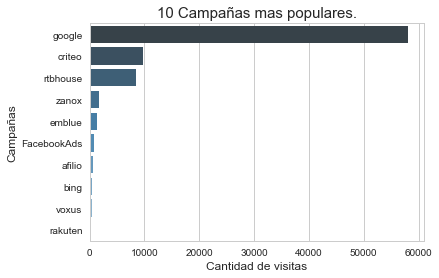

In [110]:

g2 = sns.barplot(x=campanias_populares.head(10).values, y=ad_campaign_hit['campaign_source'].value_counts().head(10).index,palette="Blues_d", orient='h')

g2.set_title("10 Campañas mas populares.", fontsize=15)
g2.set_xlabel("Cantidad de visitas", fontsize=12)
g2.set_ylabel("Campañas", fontsize=12)

**2.2.2)¿Cuáles fueron las campañas publicitarias más populares según el mes?**

In [50]:
pd.crosstab(ad_campaign_hit.timestamp_month,ad_campaign_hit.campaign_source)

campaign_source,Facebook,FacebookAds,FacebookSocial,Google Social,MARKETING SOCIAL,afiliado,afilio,bing,blog,buscape,...,indexa,manifest,mercadopago,onsite,rakuten,rtbhouse,socialmedia,voxus,yotpo,zanox
timestamp_month,,,,,,,,,,,,,,,,,,,,,
1,0,59,3,0,0,0,101,16,1,33,...,6,1,0,0,0,136,1,0,1,70
2,2,63,0,0,0,0,26,11,0,44,...,1,0,0,3,0,274,0,0,0,62
3,12,208,0,0,0,8,55,52,13,62,...,13,2,0,0,0,717,0,0,0,157
4,6,15,0,0,0,5,94,53,11,0,...,8,31,0,0,32,1598,0,0,1,252
5,38,111,5,0,0,14,264,255,5,2,...,81,55,10,0,113,4122,0,320,19,737
6,19,308,0,1,7,7,152,97,7,0,...,45,37,8,0,165,1703,0,112,4,395


Text(0,0.5,'Cantidad de clicks')

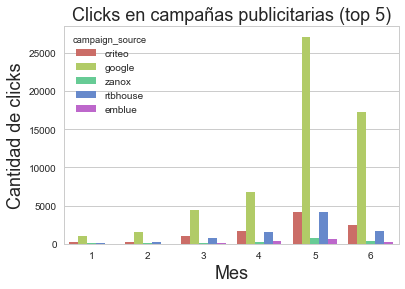

In [111]:
camp_ppales = ['google','criteo', 'rtbhouse', 'zanox', 'emblue']
g = sns.countplot(x="timestamp_month", hue="campaign_source"\
                , data=ad_campaign_hit.loc[ad_campaign_hit['campaign_source'].isin(camp_ppales)], palette="hls")
g.set_title("Clicks en campañas publicitarias (top 5)", fontsize=18)
g.set_xlabel("Mes", fontsize=18)
g.set_ylabel("Cantidad de clicks", fontsize=18)

**2.2.3) ¿Cuáles fueron los click por día de las cinco campañas publicitarias más populares?**

Text(0,0.5,'Cantidad de clicks')

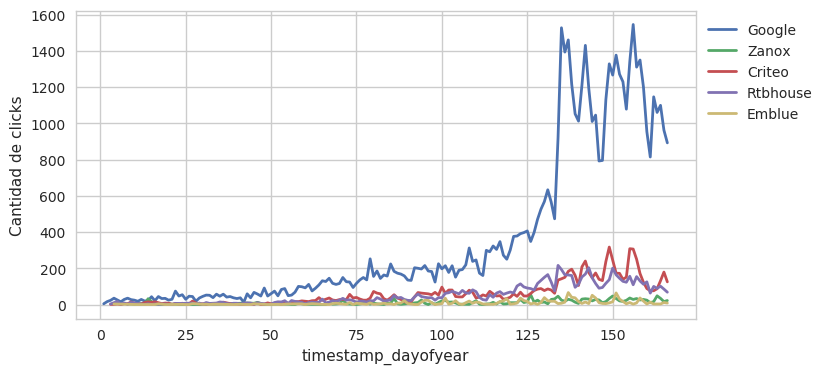

In [61]:
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'google']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4),label = 'Google')
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'zanox']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4), label = 'Zanox')
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'criteo']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4), label = 'Criteo')
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'rtbhouse']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4), label = 'Rtbhouse')
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'emblue']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4), label = 'Emblue')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.ylabel('Cantidad de clicks')


**2.2.4)¿Cuáles fueron las URL más accedidas? -> HACER ESTE ANÁLISIS ES MUY IMPORTANTE**

En base a esto, podemos ver qué urls son las más accedidas, en función de eso podemos ver qué productos fueron los más accedidos. Estos son distintos a los de Viwed Product, ya que son los productos más accedidos según una publicidad. 

In [245]:
ad_campaign_hit['url'].value_counts(normalize = False).drop(labels = '/')

/comprar/iphone                                     4132
/comprar/iphone/6s                                  3393
/comprar/iphone/6                                   3228
/comprar/samsung                                    2782
/comprar/iphone/iphone-5s                           2689
/comprar/samsung/galaxy-j5                          2446
/comprar/samsung/galaxy-s7-edge                     1972
/comprar/samsung/galaxy-s8                          1499
/comprar/samsung/galaxy-j7                          1465
/comprar/samsung/galaxy-s6-edge                     1415
/comprar/motorola                                   1154
/comprar/samsung/galaxy-s7                          1139
/comprar/iphone/7                                   1120
/comprar/samsung/galaxy-s6-flat                     1067
/comprar/iphone/iphone-6s-plus                       947
/comprar/samsung/samsung-gran-prime-duos-tv          944
/comprar/samsung/a5                                  906
/comprar/samsung/              

**2.2.6)¿Cuántas personas entraron a vender versus las personas que entraron a comprar?**

In [266]:
ad_campaign_hit_url_ventas = ad_campaign_hit.url.dropna().to_frame()
ad_campaign_hit_url_ventas = ad_campaign_hit_url_ventas.loc[ad_campaign_hit_url_ventas.url.str.contains('vender')]

ad_campaign_hit_url_compras = ad_campaign_hit.url.dropna().to_frame()
ad_campaign_hit_url_compras = ad_campaign_hit_url_compras.loc[ad_campaign_hit_url_compras.url.str.contains('compra')]
#ad_campaign_hit_url_compras['url'].value_counts().head(10).plot(kind = 'barh') -> NO ES UN BUEN GRÁFICO
print(ad_campaign_hit_url_compras.size)
ad_campaign_hit_url_ventas.size


54209


221

La cantidad de personas que quiso vender (221) es muchisimo menor que la cantidad de personas que quisieron comprar (54209). 

**2.2.7)¿Qué marca más se quería vender?**

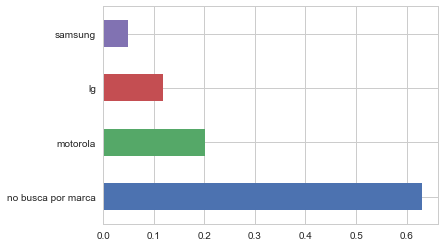

In [308]:
ad_campaign_hit_url_ventas_split = ad_campaign_hit_url_ventas['url'].str.split("/",expand = True)
ad_campaign_hit_url_ventas_split
ad_campaign_hit_url_ventas_split = ad_campaign_hit_url_ventas_split.loc[:,2:4]
#En este caso los nulls son importantes. Los nulls en la columnas 2 y 3 significan que sólo entró 
#a vender. Los nulls en la fila 3 significa que buscó por marca. 
ad_campaign_hit_url_ventas_split = ad_campaign_hit_url_ventas_split.rename(index=str,columns={2: "marca", 3: "modelo"})
ad_campaign_hit_url_ventas_split = ad_campaign_hit_url_ventas_split.replace('','no busca por marca')
estadistica_de_ventas_segun_marca = ad_campaign_hit_url_ventas_split['marca'].value_counts(normalize = True)
estadistica_de_ventas_segun_marca.plot(kind = 'barh')



**2.2.8)¿Qué modelo más quería vender?**

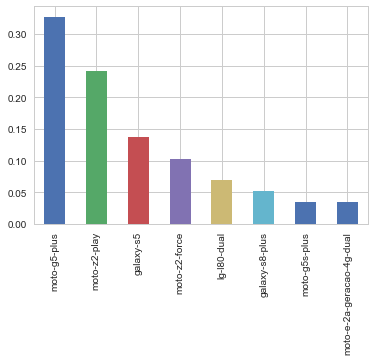

In [299]:
#En este caso los nulls no son importantes. 
ad_campaign_hit_url_ventas_split_modelo = ad_campaing_hit_url_ventas_split['modelo']#.to_frame()
ad_campaign_hit_url_ventas_split_modelo.dropna().value_counts(normalize = True).plot(kind = 'bar')

**2.2.9)¿Qué marca más se quería comprar? -> también aparece la opción ofertas y la opción list** 

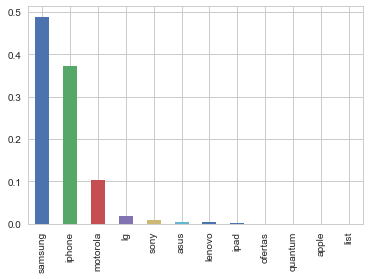

In [306]:
ad_campaign_hit_url_compras_split = ad_campaign_hit_url_compras['url'].str.split("/",expand = True).loc[:,2:3]
ad_campaign_hit_url_compras_split = ad_campaign_hit_url_compras_split.rename(index = str, columns = {2: "marca", 3:"modelo"})
ad_campaign_hit_url_compras_split['marca'].value_counts(normalize = True).plot(kind = 'barh')

**2.2.10)¿Qué modelo más se quería comprar? -> NO SE SI VALE LA PENA**

In [311]:
#ESTE ANÁLISIS ES MUCHO MÁS COMPLICADO PORQUE UN MISMO MODELO
#APARECE DE FORMA DISTINTA. EJ: 6S IPHONE 6S
ad_campaign_hit_url_compras_split['modelo'].value_counts().head()

6s                                 3393
6                                  3228
iphone-5s                          2781
galaxy-j5                          2446
galaxy-s7-edge                     1972
                                   1545
galaxy-s8                          1499
galaxy-j7                          1465
galaxy-s6-edge                     1415
galaxy-s7                          1139
7                                  1120
galaxy-s6-flat                     1067
iphone-6s-plus                      949
samsung-gran-prime-duos-tv          944
a5                                  906
galaxy-s8-plus                      849
iphone-se                           795
iphone-5c                           722
iphone-5                            717
galaxy-j7-prime                     697
7-plus                              675
moto-g-2a-geracao                   602
galaxy-s6-edge-plus                 522
moto-x-play-4g-dual                 460
galaxy-s5                           445


**2.2.11)¿En qué mes se quiso vender más -> A TRAVES DE CAMPAÑAS PUBLICITARIAS?** NO CREO QUE VALGA LA PENA EL ANÁLISIS TEMPORAL

In [326]:
ad_campaign_hit.loc[:,['url','timestamp_month']]
ad_campaign_hit['url'].str.split("/")

,0,1,2,3,4
0,,comprar,iphone,iphone-5s,None
6,,comprar,samsung,galaxy-s8,None
11,,,None,None,None
15,,,None,None,None
99,,comprar,samsung,galaxy-j5,None
101,,comprar,samsung,galaxy-j5,None
107,,comprar,iphone,6,None
111,,comprar,samsung,galaxy-s6-flat,None
119,,,None,None,None
132,,comprar,iphone,None,None


**2.2.10)CUALES SON LAS PRINCIPALES MARCAS QUE SE QUERIAN COMPRAR Y VENDER

**Cuáles son las personas que más clickean -> CREO QUE ÉSTE ANÁLISIS NO SIRVE DE NADA. Lo comento para que no ocupe RAM** 

In [72]:
#ad_campaign_hit['person'].value_counts() # Ver si lo puedo relacionar con algo. !

a202cfba    279
c013417a    277
5af7e2bc    220
875eb866    207
5107ab49    167
14752aa3    152
13d3dbee    147
ff9dc4b8    144
3952fd6f    144
7433a87f    133
e2b0ce1b    131
ba102035    127
d9251b63    122
778fcfbd    119
0b2bff0b    116
dfb2ba6c    112
f3c1111e    110
8fb99250    109
4f50d6c5    102
4ba1247a    101
95b58cd6    100
ff637ea2    100
9ab4565c     92
a1e1f8ec     91
f0887975     87
8ade1780     86
5b9f64aa     86
3444791f     86
2b87e81a     85
f3a682fb     84
           ... 
bbac73a9      1
b475a006      1
dfc9d91c      1
fc8fbffe      1
f2087711      1
889c1c21      1
eda5a0cd      1
714dfb6e      1
07981aaa      1
1303980b      1
ddc59d3b      1
2179f84c      1
ce8ffc96      1
989ef219      1
9eb80798      1
80bce38a      1
a114536c      1
d5b70bdc      1
bb3da243      1
372c1396      1
96d70a9d      1
e71df7af      1
e4bb5c8b      1
6e8e13fd      1
85586e0d      1
f8657c35      1
bbb3f4b8      1
eca46878      1
edb0bb8a      1
14c67583      1
Name: person, Length: 21

## 2.3) Generic listing

Este evento representa: El usuario visita la homepage.

2.3.1) 

In [73]:
# Podria investigar que paso con los skus, person y el tiempo.

## 2.4) Searched products
Este evento representa: El usuario realiza una búsqueda de productos en la interfaz de búsqueda del site.


**2.4.1)¿Qué suelen buscar los usuarios?**

In [112]:
searched_products['search_term'].str.lower().value_counts(normalize = True)
# Podemos ver que la mayoria de las busquedas son de celulares iPhone, seguido por los Samsung.

iphone 6                                                                           0.07
iphone                                                                             0.06
iphone 6s                                                                          0.05
iphone 7                                                                           0.03
iphone 5s                                                                          0.02
j7                                                                                 0.02
motorola                                                                           0.02
j5                                                                                 0.02
s7                                                                                 0.02
iphone 6 plus                                                                      0.02
s8                                                                                 0.01
iphone se                       

[sacar o no] Calculo aproximado de cuales son los celulares mas buscados

In [83]:
# calculo aproximado.
iphone = searched_products['search_term'].str.lower().str.contains('iphone|5s|5c|6s|7s').sum()
total = searched_products['search_term'].count()
(iphone / total) * 100 
# Los iphone constituyen aproximadamente el 40 %  de las busquedas.

39.62260297751547

In [81]:
samsung = searched_products['search_term'].str.lower().str.contains('samsung|s3|s4|s5|s6|s7|s8|j7|j5|j3|note|a3|a5|a7').sum()
(samsung / total) * 100
# Los samsung constituyen aproximadamente un 30 % de la busquedas.

30.68597218534932

In [77]:
motorola = searched_products['search_term'].str.lower().str.contains('moto').sum()
(motorola / total) * 100
# Los motorola constituyen aproximadamente un 10 % de la busquedas.

11.816121061122796

## 2.5) Search engine hit
Este evento representa: El usuario ingresa al sitio mediante un motor de búsqueda web.


**2.5.1)¿Cuáles fueron los motores de busqueda más populares?**

Google                   0.99
Bing                     0.01
Yahoo                    0.01
Ask                      0.00
Name: search_engine, dtype: float64


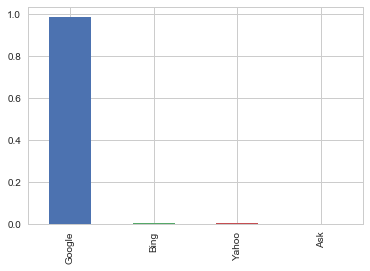

In [123]:
# Las visitas se dan por un motor de busqueda. Cuales son los mas populares?
search_engine = search_engine_hit['search_engine']
search_engine_v = search_engine.value_counts(normalize = True)
print(search_engine_v)
search_engine_v.plot(kind = "bar") #-> NO CREO QUE SE JUSTIFIQUE ESTE GRÁFICO

Podemos ver que el acceso desde otros motores de búsqueda que no son google son despreciables. 

El problema de la escala logarítmica es que distorciona la realidad. 

Text(0,0.5,'Motores de busqueda')

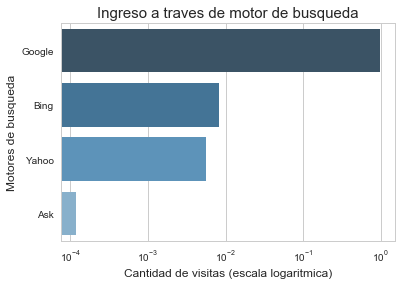

In [124]:
# Ingresos a traves de un motor de busqueda.

g = sns.barplot(x=search_engine_v.values, y=search_engine_v.index,palette="Blues_d", orient='h')
g.set_xscale('log')
g.set_title("Ingreso a traves de motor de busqueda", fontsize=15)
g.set_xlabel("Cantidad de visitas (escala logaritmica)", fontsize=12)
g.set_ylabel("Motores de busqueda", fontsize=12)

**2.5.2) ¿Cuáles fueron los ingresos a través de un motor de busqueda en el tiempo?**

Text(0.5,1,'Ingresos a traves de un motor de busqueda en el tiempo')

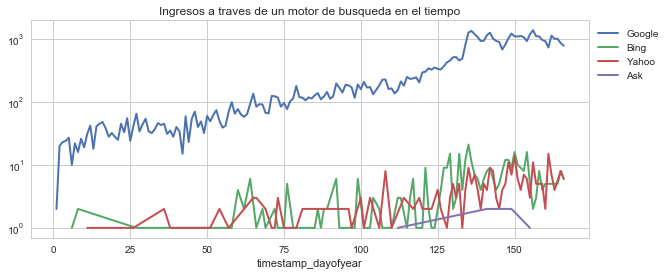

In [125]:
# Ingresos a traves de un motor de busqueda en el tiempo.

(search_engine_hit.loc[search_engine== 'Google']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(10,4),label = 'Google', logy = True)
(search_engine_hit.loc[search_engine == 'Bing']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,label = 'Bing')
(search_engine_hit.loc[search_engine == 'Yahoo']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,label = 'Yahoo')
(search_engine_hit.loc[search_engine == 'Ask']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,label = 'Ask')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Ingresos a traves de un motor de busqueda en el tiempo')


## 2.6) Checked out
Este evento representa:  El usuario ingresa al checkout de compra de un producto

**2.6.1)¿Cuáles fueron los modelos que más llegaron a check out?**

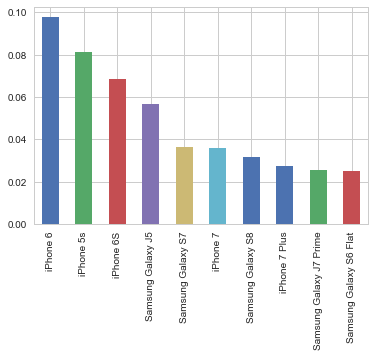

In [336]:
checkout_modelo = checkout['model'].value_counts(normalize = True)
checkout_modelo.head(10).plot(kind = 'barh')

**2.6.2)¿Cuáles fueron los almacenamientos de los modelos que más llegaron a check out?** 

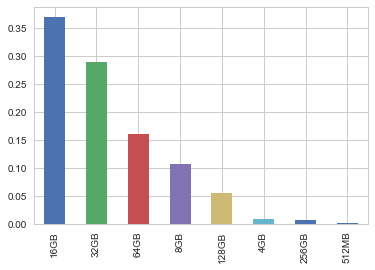

In [339]:
checkout_almacenamiento = checkout['storage'].value_counts(normalize = True)
checkout_almacenamiento.plot(kind = 'bar')

Estos porcentajes coinciden con los obtenidos en viewed product (2.1.3)

**2.6.3)¿Cuáles fueron los colores de los modelos que más llegaron a check out?**


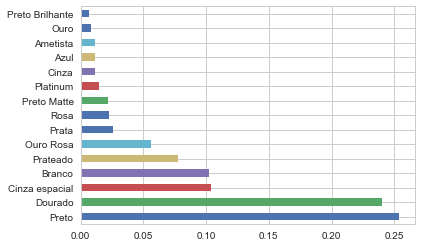

In [346]:
checkout_color = checkout['color'].value_counts(normalize = True)
checkout_color.head(15).plot(kind = 'barh')

Estos porcentajes coinciden con los obtenidos en viwed product(2.1.2). 

**2.6.4)¿cuáles fueron las condiciones de los modelos que llegaron a check out?**

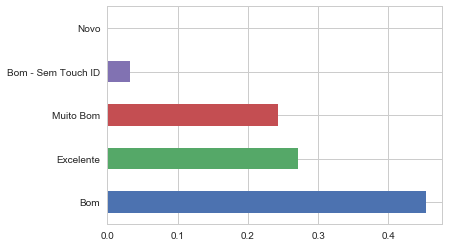

In [348]:
checkout_condition = checkout['condition'].value_counts(normalize = True)
checkout_condition.head(15).plot(kind = 'barh')

Estos porcentajes coinciden con los obtenidos en viwed product(2.1.4) 

***Hice estos análisis (2.6.1, 2.6.2, 2.6.3, 2.6.4) para ver si existía algúna anomalía respecto a lo visto en viwed product. No creo que valga la pena analizar por modelo porque la coincidencia es muy grande. Para el análisis del momento del día y mes sucede lo mismo.  *** 

## 2.7) Visited site

Este evento representa: El usuario ingresa al sitio a una determinada url

En ppio puedo relacionarlo con person, news vs returning, city, region, country, device_type, screen_resolution, operating_system_version, browser_version y el tiempo

**2.7.1)¿Son representativos los países marcados como Unknown?**

[Esto lo borré sin querer y no lo pude recuperar]

In [142]:
# No hay informacion tampoco de la ciudad ni de la region.
# Lo saco para poder analizar lo demas.
visited_site_geo = visited_site.loc[(visited_site['country'] != 'Unknown') & (visited_site['city'] != 'Unknown') & \
                                   (visited_site['region'] != 'Unknown')]

**2.7.2)¿Cuántas fueron las visitas por país?**

In [145]:
# Visitas por pais.
visited_site_geo_country = visited_site_geo['country']
visited_site_geo_country.value_counts()
# Practicamente todas las visitas fueron de Brazil.

Brazil                70935
United States           407
Argentina                86
Canada                   31
Japan                    11
United Kingdom           10
Netherlands               9
Poland                    9
Mozambique                8
Portugal                  7
Romania                   7
Dominican Republic        6
Italy                     4
France                    3
Switzerland               3
Paraguay                  2
Germany                   2
Russia                    2
India                     2
China                     1
Uruguay                   1
Mexico                    1
Morocco                   1
South Africa              1
Sri Lanka                 1
Venezuela                 1
Bangladesh                1
Turkey                    1
Name: country, dtype: int64

**2.7.3)¿Cuántas fueron las visitas por ciudad?**

In [146]:
# Visitas por ciudad.
visited_site_geo_city = visited_site_geo['city']
visited_site_geo_city.value_counts()

São Paulo                11711
Rio de Janeiro            3538
Belo Horizonte            2568
Salvador                  2314
Brasília                  1530
Osasco                    1148
Curitiba                  1132
Fortaleza                 1084
Recife                     913
Goiânia                    853
Porto Alegre               799
Guarulhos                  776
São Bernardo do Campo      716
Belém                      640
São Luís                   597
Manaus                     507
Natal                      487
Montes Claros              482
Campinas                   471
Barueri                    466
Santo André                434
Duque de Caxias            429
Petrolina                  424
Teresina                   388
Sorocaba                   376
Campo Grande               373
Maceió                     370
Contagem                   348
Nova Iguaçu                311
Carapicuiba                296
                         ...  
Itiuba                       1
Chapada 

**2.7.4)¿Cuántas fueron las visitas por región?**

In [147]:
# Visitas por region.
visited_site_geo_region = visited_site_geo['region']
visited_site_geo_region.value_counts()

Sao Paulo                           24737
Minas Gerais                         7692
Rio de Janeiro                       6749
Bahia                                5693
Pernambuco                           2932
Ceara                                2776
Parana                               2587
Rio Grande do Sul                    2540
Federal District                     1684
Goias                                1529
Santa Catarina                       1505
Para                                 1296
Maranhao                             1289
Espirito Santo                       1250
Rio Grande do Norte                  1052
Paraíba                               868
Piaui                                 815
Alagoas                               751
Mato Grosso do Sul                    617
Tocantins                             592
Amazonas                              586
Mato Grosso                           476
Sergipe                               396
Rondonia                          

** 2.7.5)¿Cuántas fueron las visitas por estados de Brasil? ** 

In [213]:
# Me quedo solo con los estados de Brasil.
## GRAFICO PENDIENTE!!!! 

# Saco los acentos y pongo todo en minuscula.

estados_br = visited_site_geo_region.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
estados_br = estados_br.str.lower()

lista_estados_br = ['acre', 'alagoas', 'amapa', 'la amazonas', 'bahia', 'ceara', 'espiritu santo', 'goias', 'maranhao', 'mato grosso', 'mato grosso do sul', 'minas gerais', 'para', 'paraiba', 'parana', 'pernambuco', 'piaui', 'rio de janeiro', 'rio grande do norte', 'rio grande do sul', 'rondonia', 'roraima', 'santa catarina', 'sao paulo', 'sergipe', 'tocantins']
estados_br = estados_br.loc[estados_br.isin(lista_estados_br)]
estados_br.value_counts()


sao paulo              24737
minas gerais            7692
rio de janeiro          6749
bahia                   5693
pernambuco              2932
ceara                   2776
parana                  2587
rio grande do sul       2540
goias                   1529
santa catarina          1505
para                    1296
maranhao                1289
rio grande do norte     1052
paraiba                  868
piaui                    815
alagoas                  751
mato grosso do sul       617
tocantins                592
mato grosso              476
sergipe                  396
rondonia                 216
amapa                    144
acre                      96
roraima                   67
Name: region, dtype: int64

**2.7.5) ¿Cuál es el uso de los canales por visita?**

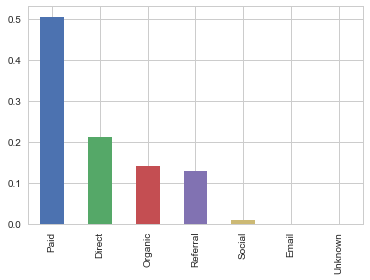

In [152]:
visited_site.channel.value_counts(normalize = True).plot(kind = "bar") #NO SÉ A QUÉ SE REFIERE CON CHANNEL

**2.7.6)¿Cuánta gente es nueva? ¿Cuánta gente volvió?**

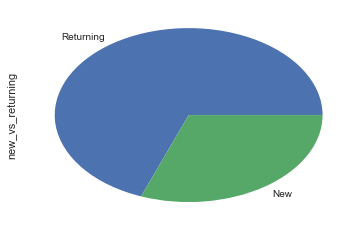

In [153]:
newVsRetruningGraf = visited_site.new_vs_returning.value_counts(normalize = True)
#print(newVsRetruningGraf)
newVsRetruningGraf.plot(kind = "pie")

  -El 69% de la gente volvió
  
  -El 39% de la gente es nueva

**2.7.7)¿Desde qué dispositivo accederon los usuarios?**

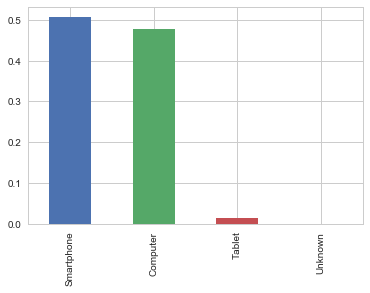

In [157]:
deviceTypeGraf = visited_site.device_type.value_counts(normalize = True)
#print(deviceTypeGraf)
deviceTypeGraf.plot(kind = "bar")

    -El 50% accede desde su teléfono
    -El 47% accede desde su computadora
    -El 1% accedde desde su tablet

**2.7.8)¿Desde qué sistema operativo accedieron los usuarios?**

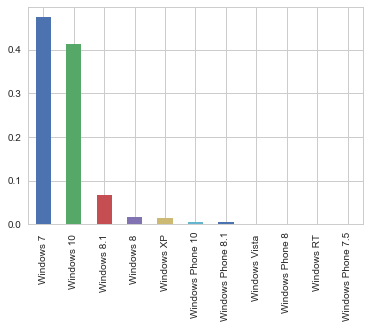

In [160]:
operatingSystemVersion = visited_site.operating_system_version
#print(operatingSystemVersion.value_counts())
#Android 
usuariosDeWindows = operatingSystemVersion.loc[operatingSystemVersion.str.contains('Windows')].value_counts(normalize = True)
usuariosDeAndroid = operatingSystemVersion.loc[operatingSystemVersion.str.contains('Android')].value_counts()
usuariosDeIos = operatingSystemVersion.loc[operatingSystemVersion.str.contains('iOS')].value_counts()
usuariosDeLinux = operatingSystemVersion.loc[operatingSystemVersion.str.contains('Linux')].value_counts()
usuariosDeMac = operatingSystemVersion.loc[operatingSystemVersion.str.contains('Mac')].value_counts()
usuariosDeWindows.plot('bar')
##operatingSystemVersion.plot(kind = "bar")
#hay 121 sistemas operativos

## 2.8) Conversion
Este evento representa:  El usuario realiza una conversión, comprando un producto

**2.8.1)¿Cuáles fueron los productos más comprados?**

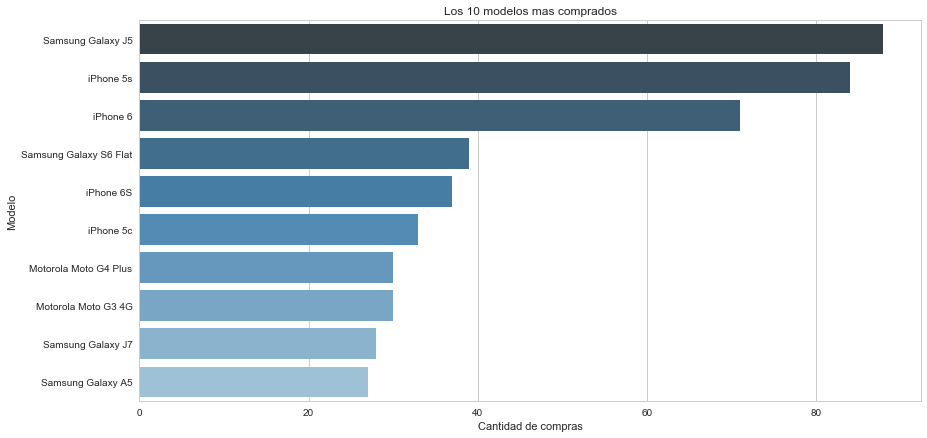

In [175]:
tf_event_mod = conversion.filter(items = ['event', 'model'])
fig, ax = plt.subplots(figsize=(14,7))
mas_comp = tf_event_mod['model'].value_counts().head(10)
g = sns.barplot(y=mas_comp.index, x=mas_comp.values, palette="Blues_d", orient='h', ax=ax)
g.set(xlabel='Cantidad de compras', ylabel='Modelo', title='Los 10 modelos mas comprados');

**2.8.2)¿Cuál fue la cantidad de productos más comprados según su condición?**

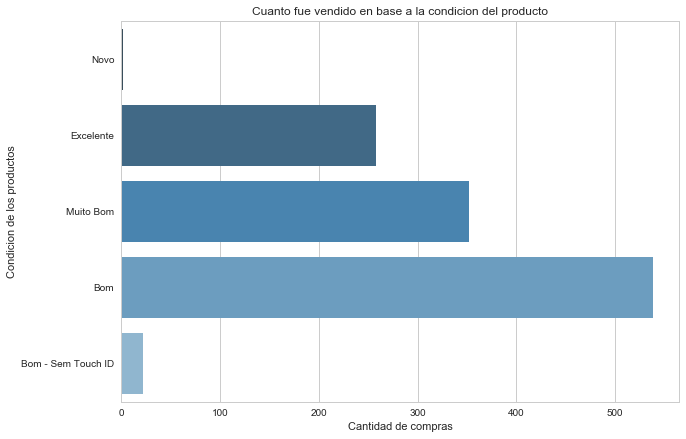

In [179]:
qual = ['Novo', 'Excelente', 'Muito Bom', 'Bom', 'Bom - Sem Touch ID']
condition = conversion['condition'].value_counts().reindex(qual)
fig, ax = plt.subplots(figsize=(10,7))
g = sns.barplot(y=condition.index, x=condition.values, palette="Blues_d", orient='h', ax=ax)
g.set(xlabel='Cantidad de compras', ylabel='Condicion de los productos', title='Cuanto fue vendido en base a la condicion del producto');

Cabe destacar que antes de comparar las ventas en base a las condiciones del produto, se deberia tener en cuenta cuantos productos de cada condicion posee la pagina.

**2.8.3)¿Cuál fue la cantidad de almacenamiento que más se vendió? ¿Coincide con viewed product?**

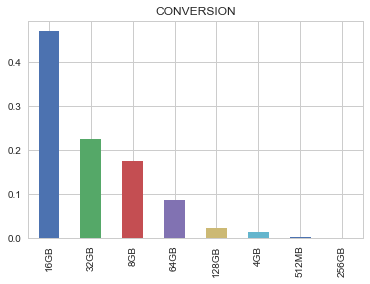

In [367]:
conversion_storage = conversion.storage.value_counts(normalize = True)
g = conversion_storage.plot(kind = 'bar')
g = g.set_title('CONVERSION')

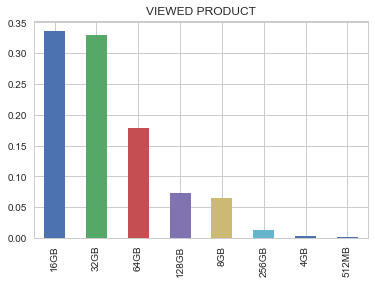

In [368]:
g = viewed_product.storage.value_counts(normalize = True).plot(kind = 'bar')
g = g.set_title('VIEWED PRODUCT')

Se puede ver que la proporción de gente que buscó dispositivos de 32 gb no es la misma que la proporción de la gente que compró de 32 gb. ¿Será por el precio? **Estaría bueno hacer un análisis que según las personas que vieron productos de 32 gb compraron los mismos**

**2.8.4)¿Cuál fue la calidad del producto que más se vendió?¿Coincide con viewed product?**

Text(0.5,1,'CONDITION')

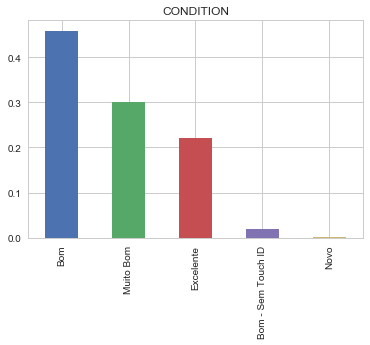

In [372]:
conversion_condition = conversion.condition.value_counts(normalize = True)
conversion_condition.plot(kind = 'bar').set_title('CONDITION')

Text(0.5,1,'VIEWED PRODUCT')

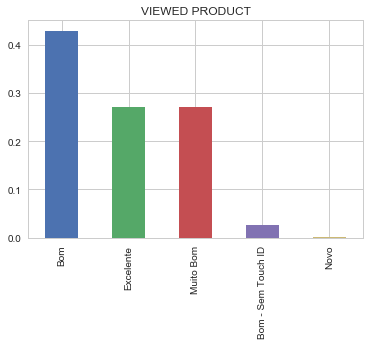

In [377]:
viewed_product.condition.value_counts(normalize = True).plot(kind = 'bar').set_title('VIEWED PRODUCT')

Se puede ver que la proporción de gente que buscó dispositivos de calidad excelente no es la misma que la proporción de la gente que compró de calidad excelente. ¿Será por el precio? **Estaría bueno hacer un análisis que según las personas que vieron productos de calidad excelente y compraron los mismos**

**2.8.5)¿Cuál es el color del producto que más se vendió?¿Coincide con viewed product?**

Text(0.5,1,'CONVERSION')

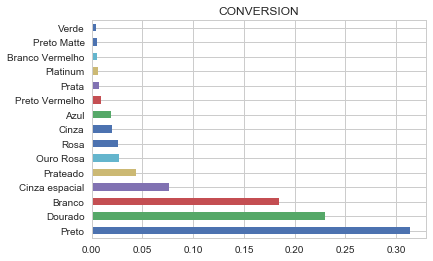

In [382]:
conversion_color = conversion.color.value_counts(normalize = True).head(15).plot(kind = 'barh').set_title('CONVERSION')
conversion_color

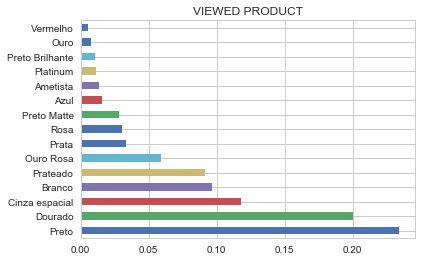

In [380]:
viewed_product = viewed_product.color.value_counts(normalize = True).head(15).plot(kind = 'barh').set_title('VIEWED PRODUCT')

Acá sucede lo mismo que antes: las proporción de personas que vieron cianza espacial no es la misma que lo compró, más personas prefirieron el blanco. 

## 2.9) Staticpage
Este evento representa: El usuario visita una página

## 2.10) Lead
Este evento representa: El usuario se registra para recibir una notificación de disponibilidad de stock, para un producto que no se encontraba disponible en ese momento.


**2.10.1)¿Cuáles fueron los modelos no disponibles con más pedidos de notificación de stock?**

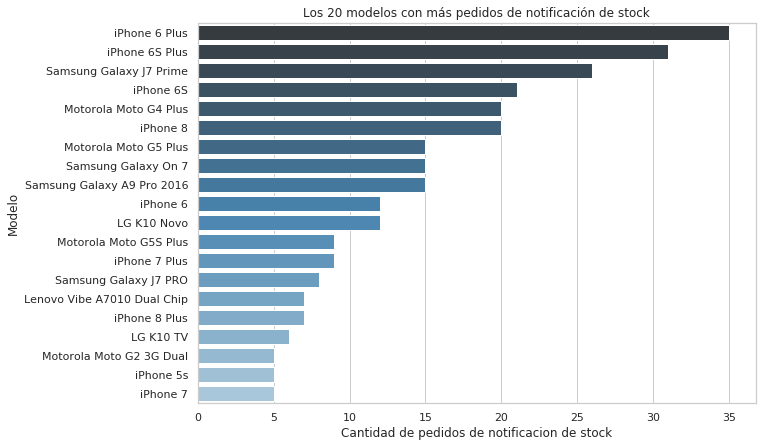

In [101]:
tf_event_mod = tf.filter(items = ['event', 'model'])
mas_pedidos = tf_event_mod.loc[tf_event_mod['event'] == 'lead']['model'].value_counts().head(20)
fig, ax = plt.subplots(figsize=(10,7))
g = sns.barplot(y=mas_pedidos.index, x=mas_pedidos.values, palette="Blues_d", orient='h', ax=ax)
g.set(xlabel='Cantidad de pedidos de notificacion de stock', ylabel='Modelo',\
      title='Los 20 modelos con más pedidos de notificación de stock');

## 2.11) Brand listing